In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import warnings
import random

In [2]:
# Dataset - A

# Specify the file path
file_path = 'facebook_combined.txt'

# Read the network from the text file
G1 = nx.read_edgelist(file_path)

In [3]:
# Dataset - B

# Read the edge list from the CSV file
edge_list_file = 'lastfm_asia_edges.csv'
edges_df = pd.read_csv(edge_list_file)

# Read the node features from the JSON file
features_file = 'lastfm_asia_features.json'
with open(features_file, 'r') as f:
    node_features = json.load(f)

# Create a graph and add nodes and edges
G2 = nx.Graph()

# Assuming features is a list
for node_id, features in node_features.items():
    G2.add_node(int(node_id), features=features)

# Add edges
for index, row in edges_df.iterrows():
    G2.add_edge(row['node_1'], row['node_2'])

In [4]:
# Dataset - C
# Prepared using Barabasi-Albert Model

# Initialize the network with m0 nodes
m0 = 5
G3 = nx.cycle_graph(m0)  # Initialize a cycle graph with m0 nodes
node_order = list(range(m0))

# Set the number of edges for new nodes
m = 3

# Add new nodes to the network
for i in range(m0, 10000):
    # Choose m existing nodes to connect to
    nodes = list(G3.nodes())
    degrees = np.array([G3.degree(node) for node in nodes])
    probs = degrees / np.sum(degrees)
    choices = np.random.choice(nodes, size=m, replace=False, p=probs)
    # Connect the new node to the chosen nodes
    G3.add_node(i)
    for node in choices:
        G3.add_edge(i, node)
    node_order.append(i)


# Save the network to a file
nx.write_edgelist(G3, "scale_free_network.txt")

In [5]:
# Find the node with the highest degree and its order of arrival
degrees = [(node_order.index(node), node, G3.degree(node)) for node in G3.nodes()]
max_degree_node = max(degrees, key=lambda x: x[2])

# Check if the node with the highest degree belongs to the initializing step
if max_degree_node[0] < m0:
    print("Node with highest degree belongs to the initializing step.")
else:
    time_interval = max_degree_node[0] - m0
    print("Node with highest degree:", max_degree_node[1])
    print("Time interval:", time_interval)

Node with highest degree belongs to the initializing step.


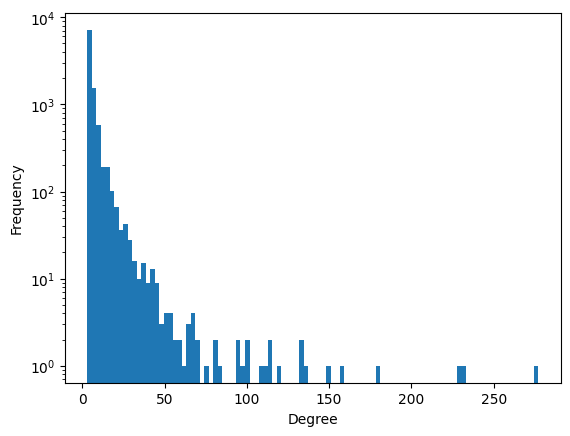

In [6]:
# Calculate the degree distribution for all nodes
degrees = [G3.degree(node) for node in G3.nodes()]

# Plot the degree distribution as a histogram
plt.hist(degrees, bins=100,log=True)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In [7]:
# Find the node with the lowest degree
min_degree_node = min(G3.nodes(), key=G3.degree)
min_degree = G3.degree(min_degree_node)

print("Node with lowest degree:", min_degree_node)
print("Minimum degree of any node:", min_degree)


# Find the node with the highest degree
max_degree_node = max(G3.nodes(), key=G3.degree)
max_degree = G3.degree(max_degree_node)

print("Node with highest degree:", max_degree_node)
print("Maximum degree of any node:", max_degree)


# Calculate the average degree of the network
total_degree = sum(dict(G3.degree()).values())
average_degree = total_degree / len(G3)
print("Average degree of the network:", average_degree)

# Calculate average local clustering coefficient
avg_local_clustering = nx.average_clustering(G3)
print("Average Local Clustering Coefficient:", avg_local_clustering)

# Calculate global clustering coefficient (transitivity)
transitivity_value = nx.transitivity(G3)
print("Global Clustering Coefficient / Transitivity of the network:", transitivity_value)

Node with lowest degree: 147
Minimum degree of any node: 3
Node with highest degree: 4
Maximum degree of any node: 277
Average degree of the network: 5.998
Average Local Clustering Coefficient: 0.005035070904000253
Global Clustering Coefficient / Transitivity of the network: 0.002545250538872649


# Consider 6 Centrality Measures mentioned below for the nodes in the network

■ Degree Centrality
■ EigenVector Centrality
■ Katz Centrality
■ PageRank Centrality
■ Betweenness Centrality
■ Closeness Centrality

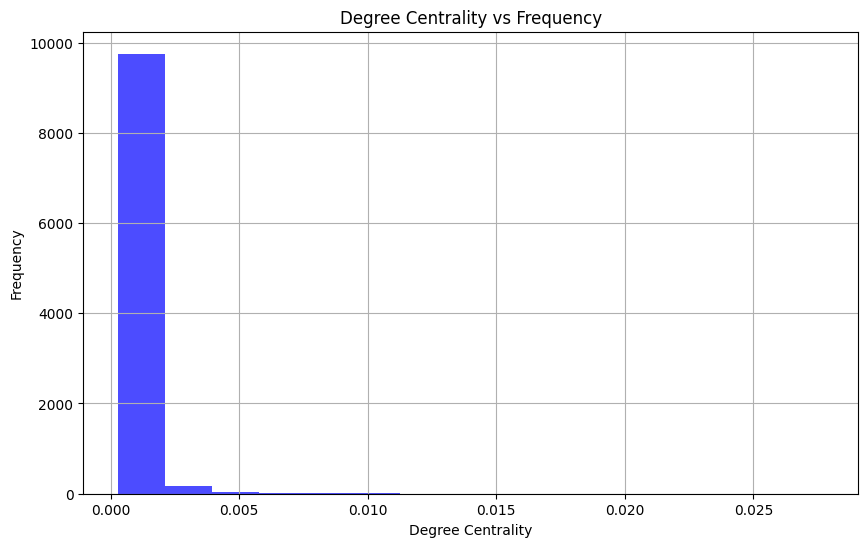

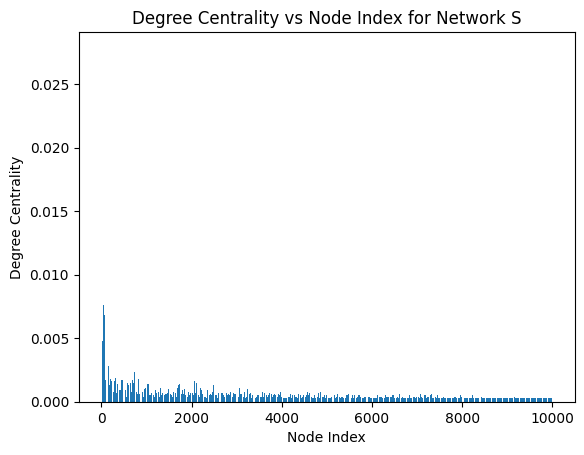

    Degree Centrality
4            0.027703
7            0.023102
3            0.022902
2            0.018102
8            0.015702
0            0.015002
11           0.013501
16           0.013401
25           0.013401
17           0.012001


In [8]:
# Calculate degree centrality for all nodes
degree_centrality = nx.degree_centrality(G3)

# Plotting degree centrality vs frequency (histogram)
plt.figure(figsize=(10, 6))
plt.hist(degree_centrality.values(), bins=15, color='blue', alpha=0.7)
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality vs Frequency')
plt.grid(True)
plt.show()

# Create a bar chart to visualize degree centrality vs node index
fig, ax = plt.subplots()
ax.bar(range(len(degree_centrality)), list(degree_centrality.values()))
ax.set_xlabel('Node Index')
ax.set_ylabel('Degree Centrality')
ax.set_title('Degree Centrality vs Node Index for Network S')
plt.show()


# Convert centrality dictionary to DataFrame
centrality_df = pd.DataFrame.from_dict(degree_centrality, orient='index', columns=['Degree Centrality'])
# Sort DataFrame by centrality values in descending order
centrality_df = centrality_df.sort_values(by='Degree Centrality', ascending=False)
# Print top 10 centrality values
print(centrality_df.head(10))

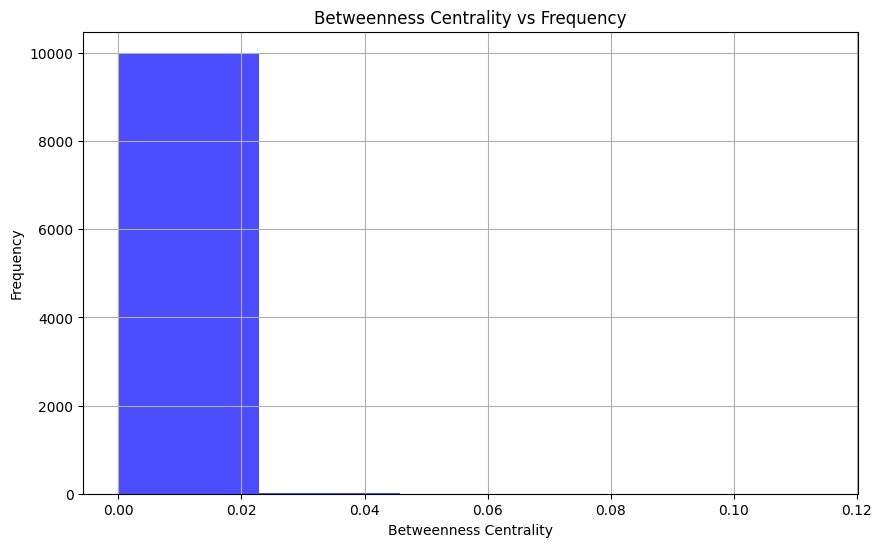

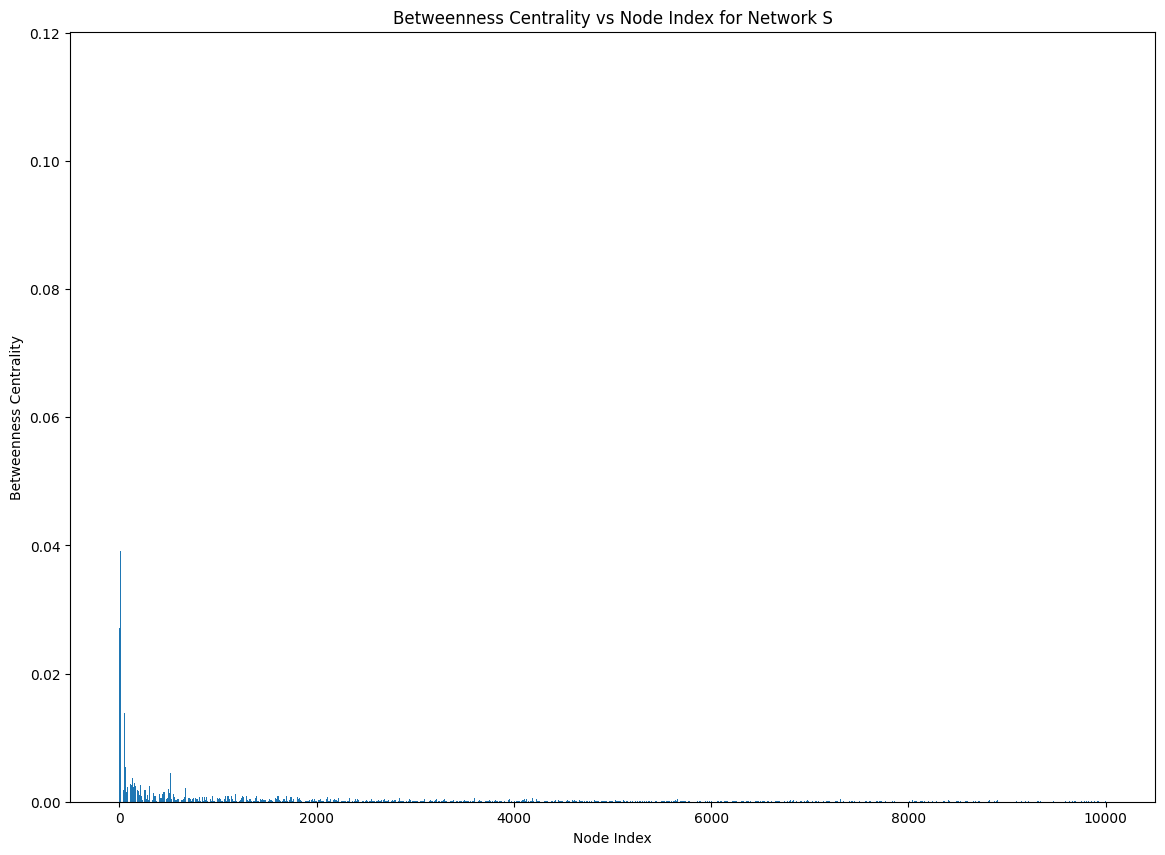

    Betweenness Centrality
4                 0.114482
3                 0.094770
7                 0.089859
0                 0.055329
2                 0.051436
8                 0.042654
11                0.039070
9                 0.033986
17                0.031640
16                0.030986


In [9]:
# Calculate betweenness centrality for all nodes
betweenness_centrality = nx.betweenness_centrality(G3)

# Plotting degree centrality vs frequency (histogram)
plt.figure(figsize=(10, 6))
plt.hist(betweenness_centrality.values(), bins=5, color='blue', alpha=0.7)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality vs Frequency')
plt.grid(True)
plt.show()


# Create a bar chart to visualize Betweenness centrality vs node index
fig, ax = plt.subplots(figsize=(14, 10))
ax.bar(range(len(betweenness_centrality)), list(betweenness_centrality.values()))
ax.set_xlabel('Node Index')
ax.set_ylabel('Betweenness Centrality')
ax.set_title('Betweenness Centrality vs Node Index for Network S')
plt.show()


# Convert centrality dictionary to DataFrame
centrality_df = pd.DataFrame.from_dict(betweenness_centrality, orient='index', columns=['Betweenness Centrality'])
# Sort DataFrame by centrality values in descending order
centrality_df = centrality_df.sort_values(by='Betweenness Centrality', ascending=False)
# Print top 10 centrality values
print(centrality_df.head(10))

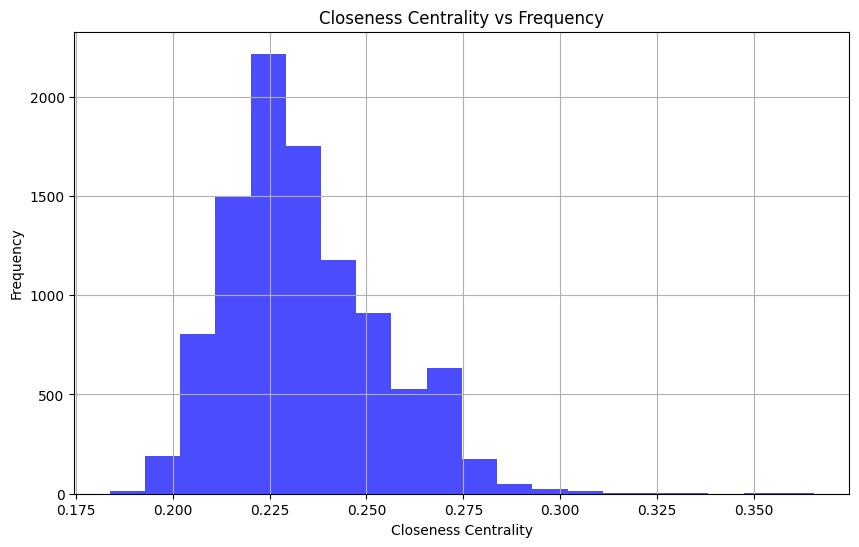

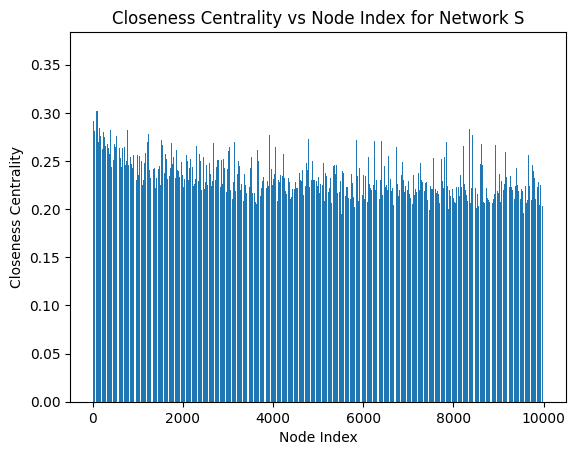

    Closeness Centrality
4               0.365567
3               0.360324
7               0.356356
0               0.349298
9               0.334437
2               0.334001
8               0.333723
11              0.332734
17              0.325234
6               0.323393


In [10]:
# Calculate closeness centrality for all nodes
closeness_centrality = nx.closeness_centrality(G3)

# Plotting degree centrality vs frequency (histogram)
plt.figure(figsize=(10, 6))
plt.hist(closeness_centrality.values(), bins=20, color='blue', alpha=0.7)
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Closeness Centrality vs Frequency')
plt.grid(True)
plt.show()

# Create a bar chart to visualize closeness centrality vs node index
fig, ax = plt.subplots()
ax.bar(range(len(closeness_centrality)), list(closeness_centrality.values()))
ax.set_xlabel('Node Index')
ax.set_ylabel('Closeness Centrality')
ax.set_title('Closeness Centrality vs Node Index for Network S')
plt.show()

# Convert centrality dictionary to DataFrame
centrality_df = pd.DataFrame.from_dict(closeness_centrality, orient='index', columns=['Closeness Centrality'])
# Sort DataFrame by centrality values in descending order
centrality_df = centrality_df.sort_values(by='Closeness Centrality', ascending=False)
# Print top 10 centrality values
print(centrality_df.head(10))

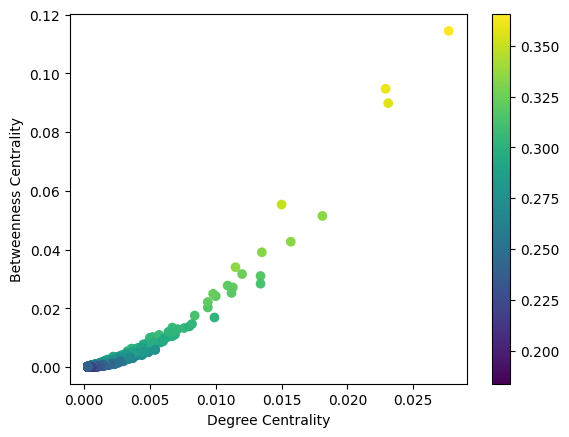

In [11]:
# Create a scatter plot to visualize the centrality measures
x = [degree_centrality[node] for node in G3.nodes()]
y = [betweenness_centrality[node] for node in G3.nodes()]
c = [closeness_centrality[node] for node in G3.nodes()]

plt.scatter(x, y, c=c, cmap='viridis')
plt.xlabel("Degree Centrality")
plt.ylabel("Betweenness Centrality")
plt.colorbar()
plt.show()

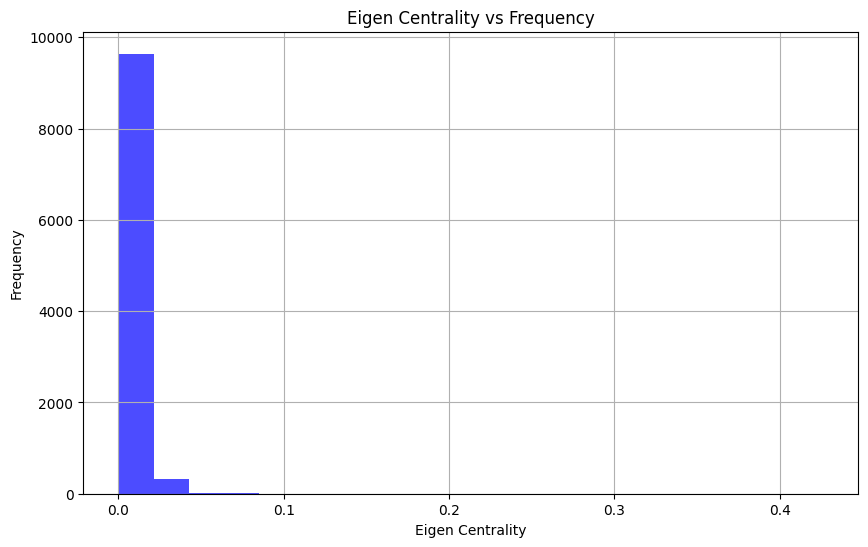

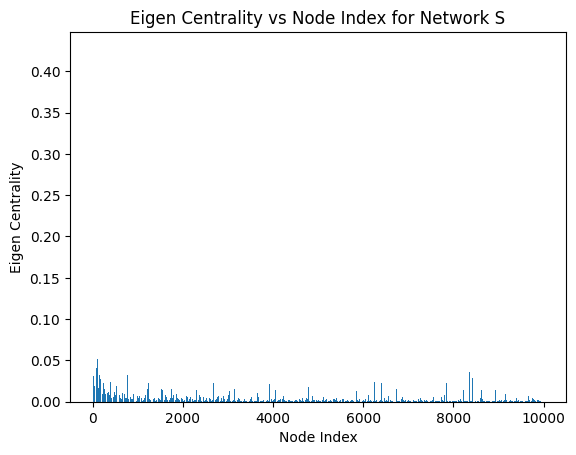

    Eigenvalue Centrality
4                0.426084
3                0.275960
7                0.272454
0                0.175994
8                0.142269
11               0.131879
2                0.120066
9                0.116078
6                0.091613
17               0.088596


In [12]:
# Calculate eigen vector centrality for all nodes
eigen_centrality = nx.eigenvector_centrality(G3)

# Plotting degree centrality vs frequency (histogram)
plt.figure(figsize=(10, 6))
plt.hist(eigen_centrality.values(), bins=20, color='blue', alpha=0.7)
plt.xlabel('Eigen Centrality')
plt.ylabel('Frequency')
plt.title('Eigen Centrality vs Frequency')
plt.grid(True)
plt.show()

# Create a bar chart to visualize closeness centrality vs node index
fig, ax = plt.subplots()
ax.bar(range(len(eigen_centrality)), list(eigen_centrality.values()))
ax.set_xlabel('Node Index')
ax.set_ylabel('Eigen Centrality')
ax.set_title('Eigen Centrality vs Node Index for Network S')
plt.show()

# Convert centrality dictionary to DataFrame
centrality_df = pd.DataFrame.from_dict(eigen_centrality, orient='index', columns=['Eigenvalue Centrality'])
# Sort DataFrame by centrality values in descending order
centrality_df = centrality_df.sort_values(by='Eigenvalue Centrality', ascending=False)
# Print top 10 centrality values
print(centrality_df.head(10))

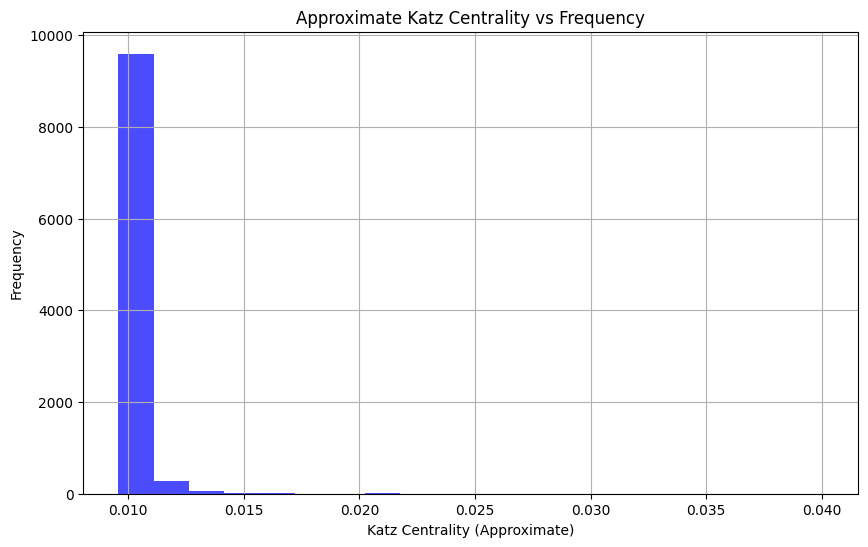

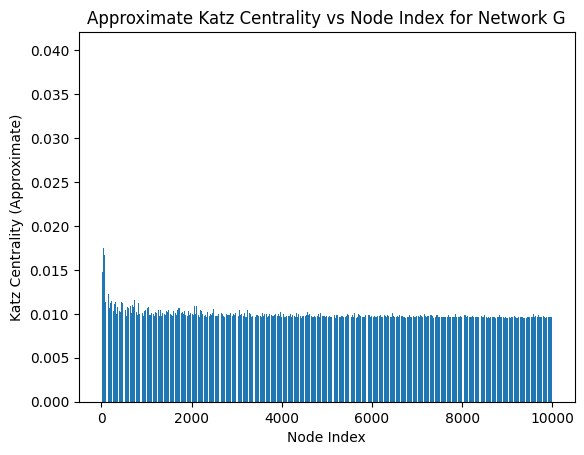

    Katz Centrality (Approximate)
4                        0.040048
3                        0.034937
7                        0.034838
2                        0.028722
0                        0.026616
8                        0.026463
11                       0.024318
16                       0.023528
25                       0.023358
17                       0.022422


In [13]:
warnings.filterwarnings("ignore", category=FutureWarning)

# Calculate approximate Katz centrality
katz_centrality_approx = nx.katz_centrality_numpy(G3, alpha=0.01, beta=0.1)

# Plotting Katz centrality vs frequency (histogram)
plt.figure(figsize=(10, 6))
plt.hist(katz_centrality_approx.values(), bins=20, color='blue', alpha=0.7)
plt.xlabel('Katz Centrality (Approximate)')
plt.ylabel('Frequency')
plt.title('Approximate Katz Centrality vs Frequency')
plt.grid(True)
plt.show()

# Create a bar chart to visualize Katz centrality vs node index
fig, ax = plt.subplots()
ax.bar(range(len(katz_centrality_approx)), list(katz_centrality_approx.values()))
ax.set_xlabel('Node Index')
ax.set_ylabel('Katz Centrality (Approximate)')
ax.set_title('Approximate Katz Centrality vs Node Index for Network G')
plt.show()

# Convert centrality dictionary to DataFrame
centrality_df = pd.DataFrame.from_dict(katz_centrality_approx, orient='index', columns=['Katz Centrality (Approximate)'])
# Sort DataFrame by centrality values in descending order
centrality_df = centrality_df.sort_values(by='Katz Centrality (Approximate)', ascending=False)
# Print top 10 centrality values
print(centrality_df.head(10))

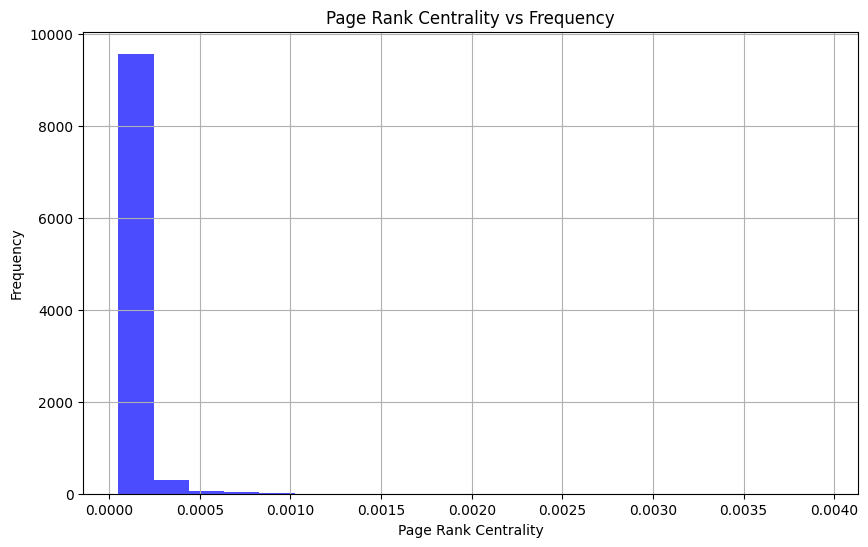

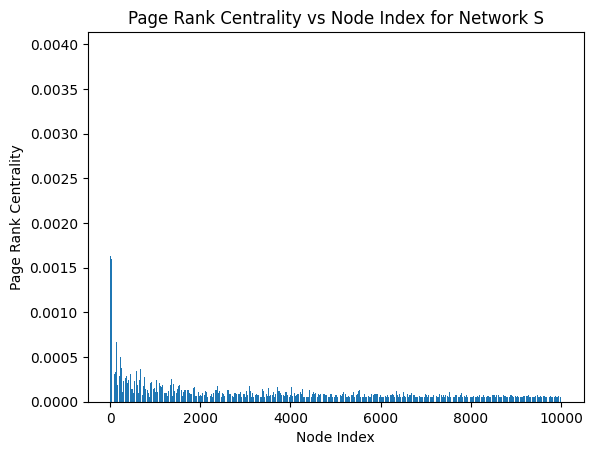

    PageRank Centrality
4              0.003937
7              0.003258
3              0.003242
2              0.002586
8              0.002244
0              0.002115
25             0.001948
16             0.001925
11             0.001904
17             0.001711


In [14]:
# Calculate PageRank centrality for all nodes
page_rank_centrality = nx.pagerank(G3)

# Plotting degree centrality vs frequency (histogram)
plt.figure(figsize=(10, 6))
plt.hist(page_rank_centrality.values(), bins=20, color='blue', alpha=0.7)
plt.xlabel('Page Rank Centrality')
plt.ylabel('Frequency')
plt.title('Page Rank Centrality vs Frequency')
plt.grid(True)
plt.show()

# Create a bar chart to visualize page Rank centrality vs node index
fig, ax = plt.subplots()
ax.bar(range(len(page_rank_centrality)), list(page_rank_centrality.values()))
ax.set_xlabel('Node Index')
ax.set_ylabel('Page Rank Centrality')
ax.set_title('Page Rank Centrality vs Node Index for Network S')
plt.show()

# Convert centrality dictionary to DataFrame
centrality_df = pd.DataFrame.from_dict(page_rank_centrality, orient='index', columns=['PageRank Centrality'])
# Sort DataFrame by centrality values in descending order
centrality_df = centrality_df.sort_values(by='PageRank Centrality', ascending=False)
# Print top 10 centrality values
print(centrality_df.head(10))

# Giant Component of the 3 Networks

Dataset - A

In [15]:
# Find the giant component in the network
components = nx.connected_components(G1)
giant_component = max(components, key=len)

# Calculate the ratio of nodes in the giant component to the total number of nodes in S
ratio = len(giant_component) / G1.number_of_nodes()

print(f"Ratio of nodes in giant component to total nodes in S: {ratio:.3f}")

Ratio of nodes in giant component to total nodes in S: 1.000


Dataset - B

In [16]:
# Find the giant component in the network
components = nx.connected_components(G2)
giant_component = max(components, key=len)

# Calculate the ratio of nodes in the giant component to the total number of nodes in S
ratio = len(giant_component) / G2.number_of_nodes()

print(f"Ratio of nodes in giant component to total nodes in S: {ratio:.3f}")

Ratio of nodes in giant component to total nodes in S: 1.000


Dataset - C

In [17]:
# Find the giant component in the network
components = nx.connected_components(G3)
giant_component = max(components, key=len)

# Calculate the ratio of nodes in the giant component to the total number of nodes in S
ratio = len(giant_component) / G3.number_of_nodes()

print(f"Ratio of nodes in giant component to total nodes in S: {ratio:.3f}")

Ratio of nodes in giant component to total nodes in S: 1.000


# Information Diffusion in the Networks

We use the Information Cascade Model (ICM) to get the time taken for the information to get diffused

In [18]:
def activation_probabilities(G):
    for node in G.nodes():
        # Retrieve the edges going out from the current node
        outgoing_edges = list(G.edges(node))
        
        # Generate random initial activation probabilities for the edges
        initial_activation_probabilities = [random.random() for _ in outgoing_edges]
        
        # Calculate the total sum of activation probabilities for the outgoing edges
        total_activation_probability = sum(initial_activation_probabilities)
        
        # Set activation probabilities for the outgoing edges to ensure their combined sum equals 1
        for edge, probability in zip(outgoing_edges, initial_activation_probabilities):
            G.edges[edge]['activation_probability'] = probability / total_activation_probability

In [19]:
def independent_cascade_model(G, num_iterations = 10):
    average_steps = 0
    for i in range(num_iterations):
        
        # Choose a starting node randomly
        source_node = random.choice(list(G.nodes()))
        
        # Initialize activated nodes with the starting node
        activated_nodes = {source_node}
        newly_activated_nodes = {source_node}
        steps = 0
        
        # Iterate until no new nodes are activated
        while newly_activated_nodes:
            
            steps += 1
            newly_activated_nodes = set()
            
            for node in activated_nodes:
                
                # Retrieve neighbors of the current node
                neighbors = list(G.neighbors(node))
                
                # Activate neighbors based on randomly generated activation probabilities
                for neighbor in neighbors:
                    if neighbor not in activated_nodes:
                        activation_probability = random.random()
                        if activation_probability <= G[node][neighbor]['activation_probability']:
                            newly_activated_nodes.add(neighbor)
                            
            # Union operation to add newly activated nodes
            activated_nodes |= newly_activated_nodes
            
        average_steps += steps
        
        
    return average_steps / num_iterations

Dataset - A

In [20]:
# Generating the Activation Probabilities for every pair of nodes (randomly)
activation_probabilities(G1)

print("The Average Number of Steps for Information Diffusion in Network - A :", independent_cascade_model(G1))

The Average Number of Steps for Information Diffusion in Network - A : 19.6


Dataset - B

In [21]:
# Generating the Activation Probabilities for every pair of nodes (randomly)
activation_probabilities(G2)

print("The Average Number of Steps for Information Diffusion in Network - B :", independent_cascade_model(G2))

The Average Number of Steps for Information Diffusion in Network - B : 22.8


Dataset - C

In [22]:
# Generating the Activation Probabilities for every pair of nodes (randomly)
activation_probabilities(G3)

print("The Average Number of Steps for Information Diffusion in Network - C :", independent_cascade_model(G3))

The Average Number of Steps for Information Diffusion in Network - C : 13.2
